# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [18]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/onecall"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"

    # Log the URL, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        response.raise_for_status()  # Raise an HTTPError for bad responses
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gamboma
Processing Record 2 of Set 1 | barabai
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | hadibu
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | mossel bay
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | saldanha
Processing Record 9 of Set 1 | vadso
Processing Record 10 of Set 1 | bandar-e lengeh
Processing Record 11 of Set 1 | dudinka
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 17 of Set 1 | skelleftea
Processing Record 18 of Set 1 | ulladulla
Processing Record 19 of Set 1 | uturoa
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | bethel
Processing Rec

In [135]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [137]:
# Display sample data 
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gamboma,-1.8764,15.8644,23.25,64,76,2.33,CG,1722912760
1,barabai,-2.5833,115.3833,32.85,49,38,0.90,ID,1722912907
2,adamstown,-25.0660,-130.1015,19.20,69,43,6.14,PN,1722912908
3,hadibu,12.6500,54.0333,25.17,84,39,8.30,YE,1722912634
4,waitangi,-43.9535,-176.5597,11.57,79,9,2.24,NZ,1722912911


In [147]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [149]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gamboma,-1.8764,15.8644,23.25,64,76,2.33,CG,1722912760
1,barabai,-2.5833,115.3833,32.85,49,38,0.90,ID,1722912907
2,adamstown,-25.0660,-130.1015,19.20,69,43,6.14,PN,1722912908
3,hadibu,12.6500,54.0333,25.17,84,39,8.30,YE,1722912634
4,waitangi,-43.9535,-176.5597,11.57,79,9,2.24,NZ,1722912911


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

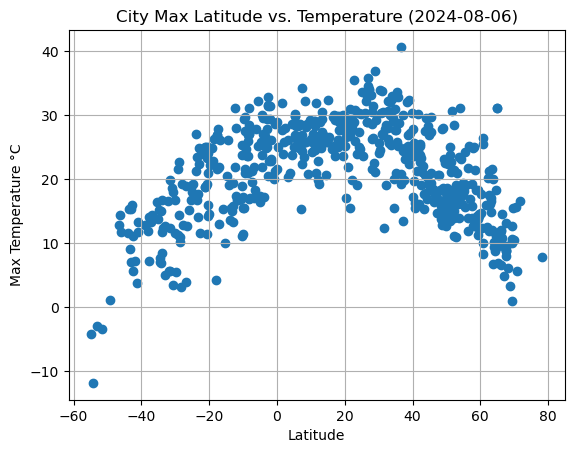

In [151]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])
# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
plt.title(f"City Max Latitude vs. Temperature ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

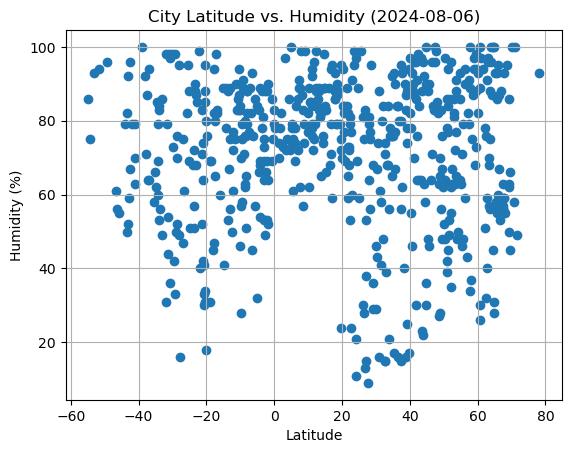

In [153]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

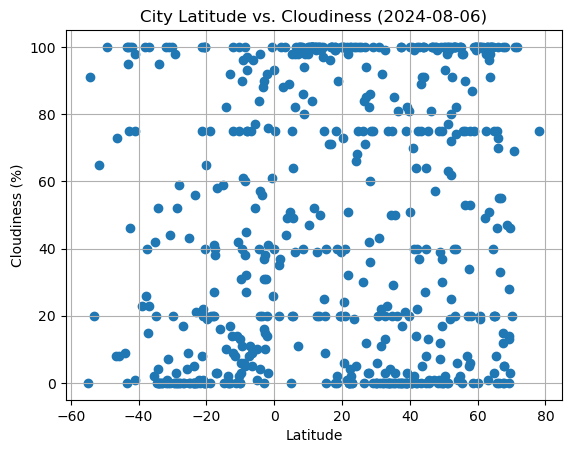

In [155]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

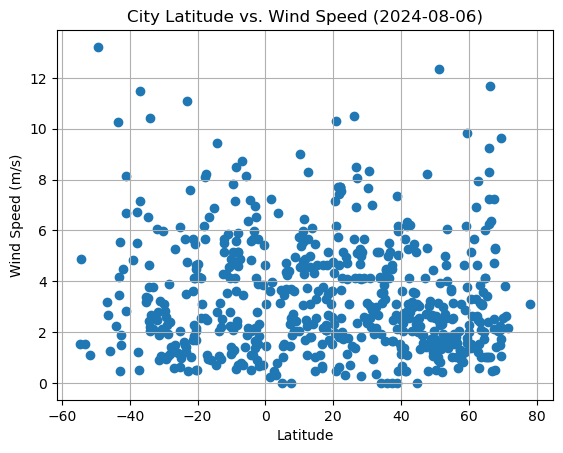

In [161]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [191]:
# Define a function to create Linear Regression plots
def linregress_plot(x, y, title=None):
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    print(f"The r-value is: {rvalue:.2f}")
    
    plt.scatter(x, y, c="blue", marker="o", edgecolor="black", linewidths=0.5, label='Data Points')
    plt.plot(x, regress_values, "r", label='Regression Line')
    plt.annotate(line_eq, (x.min(), y.min()), color="red", fontsize=12)
    plt.title(f"{x.name} vs {y.name}")    
    
    plt.xlabel(f"{x.name if hasattr(x, 'name') else 'X-axis'}")
    plt.ylabel(f"{y.name if hasattr(y, 'name') else 'Y-axis'}")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [193]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,hadibu,12.6500,54.0333,25.17,84,39,8.30,YE,1722912634
8,vadso,70.0744,29.7487,10.49,100,20,2.57,NO,1722912915
9,bandar-e lengeh,26.5579,54.8807,33.06,75,84,4.12,IR,1722912916
10,dudinka,69.4058,86.1778,12.66,50,0,9.62,RU,1722912917
12,bilibino,68.0546,166.4372,6.15,55,100,1.40,RU,1722912919


In [195]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gamboma,-1.8764,15.8644,23.25,64,76,2.33,CG,1722912760
1,barabai,-2.5833,115.3833,32.85,49,38,0.90,ID,1722912907
2,adamstown,-25.0660,-130.1015,19.20,69,43,6.14,PN,1722912908
4,waitangi,-43.9535,-176.5597,11.57,79,9,2.24,NZ,1722912911
5,mossel bay,-34.1831,22.1460,6.96,60,0,2.43,ZA,1722912912


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.68


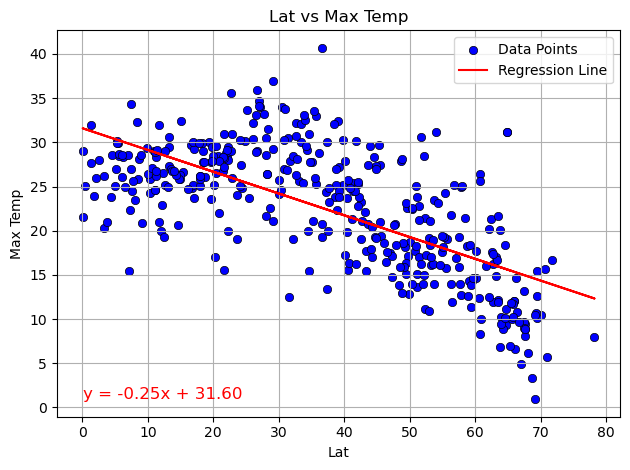

In [197]:
# Linear regression on Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

The r-value is: 0.73


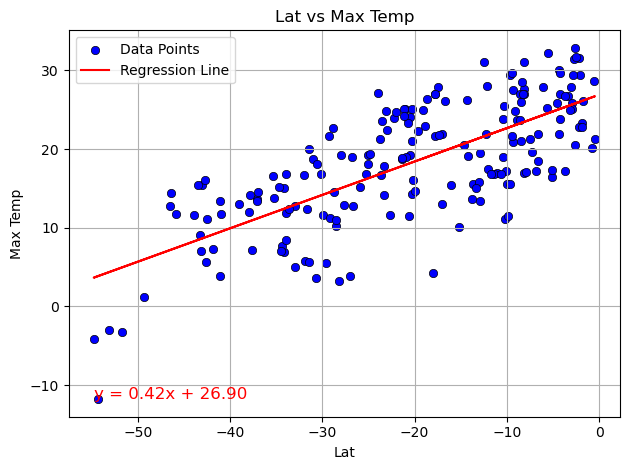

In [199]:
# Linear regression on Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** We can tell that for the nothern_hemi_df the r-value is -.68 which is showing an inverse relationship in the data frame. While southern_hemi_df has a 0.73 shows it has a strong relationship meaning if the lat goes up the max temp does as well.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.11


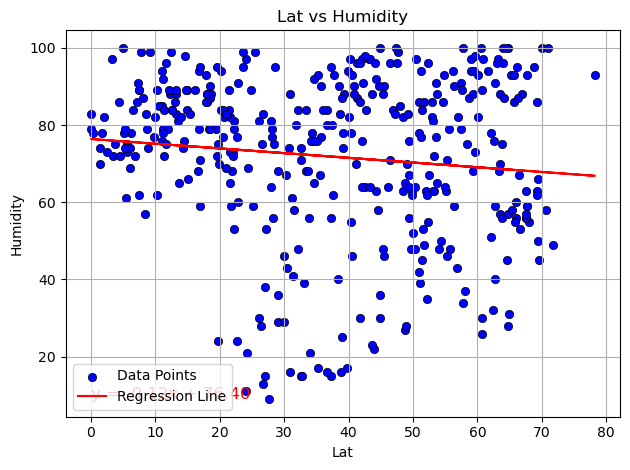

In [201]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

The r-value is: -0.02


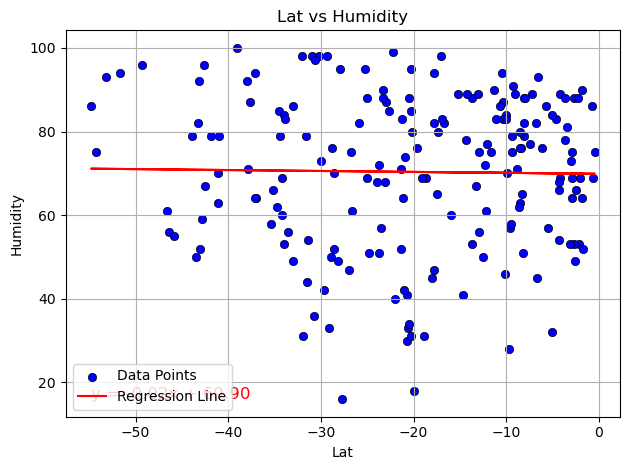

In [203]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** The scatter plots depict both a negative regression line, while it doesnt show a massive negative decline the regression line does shwo overtime the line will decrease.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.08


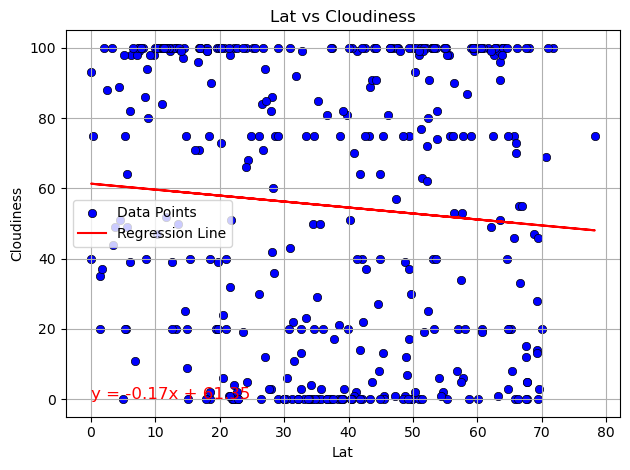

In [209]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

The r-value is: -0.00


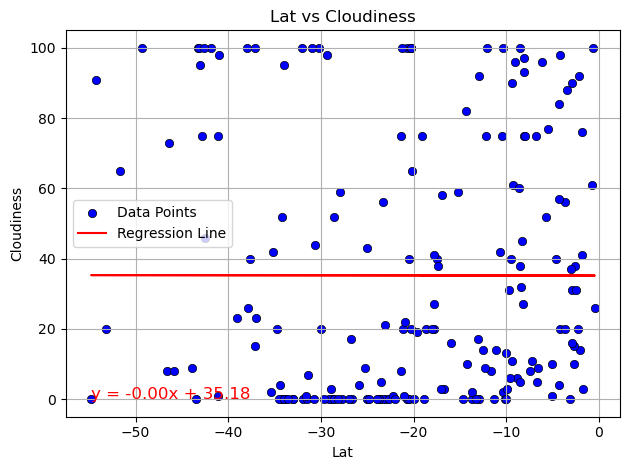

In [205]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** The southern_hemi_df scatter plot shows a neutral regression line with no change with a 0.0 while the nothern shows a negative relationship. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.09


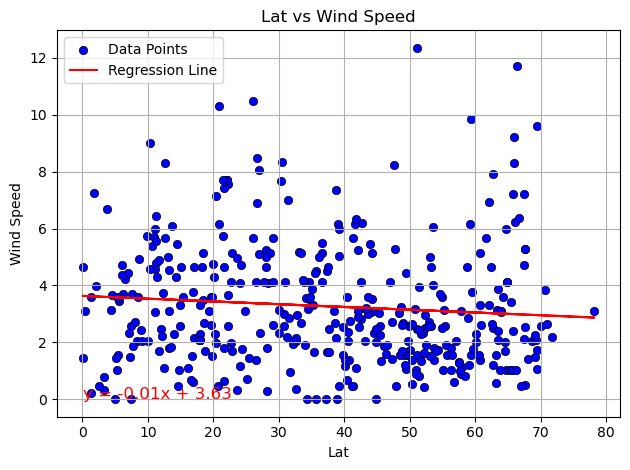

In [211]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

The r-value is: -0.03


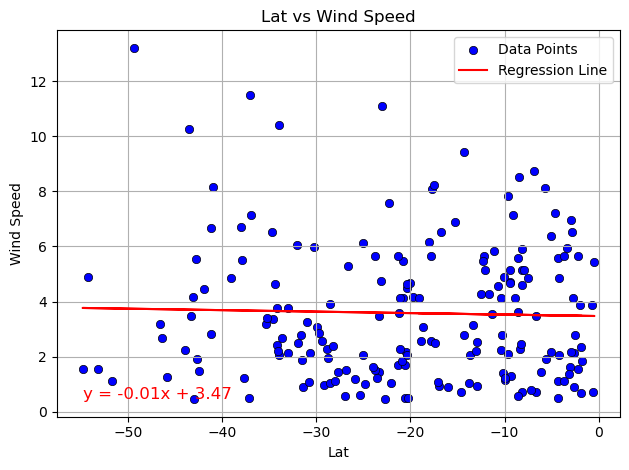

In [207]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** The scatter plots created shows that they both have negative regression lines resulting in a negative relationship, while the r2 is -.03 and -.09 they are still decreasing overtime.